<a href="https://colab.research.google.com/github/buffershivam/Hyperion_2023-24/blob/main/HilabsRound2PS_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_visit = pd.read_csv('/content/train/visit.csv')
df_care = pd.read_csv('/content/train/care.csv')
df_patient = pd.read_csv('/content/train/patient.csv')
df_diagnosis = pd.read_csv('/content/train/diagnosis.csv')
df_risk = pd.read_csv('/content/train/risk.csv')

display(df_visit.head())

,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,follow_up_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind
0,7698,URGENT CARE,80,2023-12-23,2023-12-23,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",f
1,7699,URGENT CARE,80,2024-02-18,2024-02-18,8888-12-31,NaN,"Acute pharyngitis, unspecified",f
2,7700,URGENT CARE,80,2024-03-10,2024-03-10,8888-12-31,NaN,"Acute pharyngitis, unspecified",f
3,7701,ER,80,2024-02-22,2024-02-22,8888-12-31,NaN,Periorbital cellulitis,f
4,7702,URGENT CARE,80,2024-08-04,2024-08-04,8888-12-31,NaN,"Acute pharyngitis, unspecified",f


In [ ]:
print(df_visit.info())
print(df_visit.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   visit_id        6188 non-null   int64  
 1   visit_type      6188 non-null   object 
 2   patient_id      6188 non-null   int64  
 3   visit_start_dt  6188 non-null   object 
 4   visit_end_dt    6188 non-null   object 
 5   follow_up_dt    6188 non-null   object 
 6   prmry_proc_nm   0 non-null      float64
 7   prncpl_diag_nm  6188 non-null   object 
 8   readmsn_ind     6188 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 435.2+ KB
None
visit_id             0
visit_type           0
patient_id           0
visit_start_dt       0
visit_end_dt         0
follow_up_dt         0
prmry_proc_nm     6188
prncpl_diag_nm       0
readmsn_ind          0
dtype: int64


In [ ]:
print(df_visit['readmsn_ind'].unique())

# Correct the replacement and conversion
df_visit['readmsn_ind'] = df_visit['readmsn_ind'].replace('t', 1).replace('f', 0).replace('f ',0).astype(int)

print("\nUnique values in 'readmsn_ind' after replacement and conversion:")
print(df_visit['readmsn_ind'].unique())

['f' 't']

Unique values in 'readmsn_ind' after replacement and conversion:
[0 1]


/tmp/ipython-input-4009355396.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_visit['readmsn_ind'] = df_visit['readmsn_ind'].replace('t', 1).replace('f', 0).replace('f ',0).astype(int)


In [ ]:
display(df_visit.head())
print(df_visit.info())
print(df_visit.isnull().sum())

,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,follow_up_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind
0,7698,URGENT CARE,80,2023-12-23,2023-12-23,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",0
1,7699,URGENT CARE,80,2024-02-18,2024-02-18,8888-12-31,NaN,"Acute pharyngitis, unspecified",0
2,7700,URGENT CARE,80,2024-03-10,2024-03-10,8888-12-31,NaN,"Acute pharyngitis, unspecified",0
3,7701,ER,80,2024-02-22,2024-02-22,8888-12-31,NaN,Periorbital cellulitis,0
4,7702,URGENT CARE,80,2024-08-04,2024-08-04,8888-12-31,NaN,"Acute pharyngitis, unspecified",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   visit_id        6188 non-null   int64  
 1   visit_type      6188 non-null   object 
 2   patient_id      6188 non-null   int64  
 3   visit_start_dt  6188 non-null   object 
 4   visit_end_dt    6188 non-null   object 
 5   follow_up_dt    6188 non-null   object 
 6   prmry_proc_nm   0 non-null      float64
 7   prncpl_diag_nm  6188 non-null   object 
 8   readmsn_ind     6188 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 435.2+ KB
None
visit_id             0
visit_type           0
patient_id           0
visit_start_dt       0
visit_end_dt         0
follow_up_dt         0
prmry_proc_nm     6188
prncpl_diag_nm       0
readmsn_ind          0
dtype: int64


Follow up date column is done intentionally wrong and is very important piece of data to measure. We can create new column as "has_followup" to summarise this data and use it effectively as the followup date patients have certain different risk profile than others(maybe more severe).

In [ ]:
import numpy as np
placeholder_date = '8888-12-31'

df_visit['follow_up_dt_cleaned'] = df_visit['follow_up_dt'].replace(placeholder_date, np.nan)

df_visit['follow_up_dt_cleaned'] = pd.to_datetime(df_visit['follow_up_dt_cleaned'], errors='coerce')


df_visit['has_follow_up'] = (~df_visit['follow_up_dt_cleaned'].isnull()).astype(int)


print(df_visit[['visit_id', 'follow_up_dt', 'has_follow_up']].head())

   visit_id follow_up_dt  has_follow_up
0      7698   8888-12-31              0
1      7699   8888-12-31              0
2      7700   8888-12-31              0
3      7701   8888-12-31              0
4      7702   8888-12-31              0


In [ ]:
display(df_visit.head())

,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,follow_up_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind,follow_up_dt_cleaned,has_follow_up
0,7698,URGENT CARE,80,2023-12-23,2023-12-23,8888-12-31,NaN,"Acute upper respiratory infection, unspecified",0,NaT,0
1,7699,URGENT CARE,80,2024-02-18,2024-02-18,8888-12-31,NaN,"Acute pharyngitis, unspecified",0,NaT,0
2,7700,URGENT CARE,80,2024-03-10,2024-03-10,8888-12-31,NaN,"Acute pharyngitis, unspecified",0,NaT,0
3,7701,ER,80,2024-02-22,2024-02-22,8888-12-31,NaN,Periorbital cellulitis,0,NaT,0
4,7702,URGENT CARE,80,2024-08-04,2024-08-04,8888-12-31,NaN,"Acute pharyngitis, unspecified",0,NaT,0


In [ ]:
# Convert visit_start_dt and visit_end_dt to datetime
df_visit['visit_start_dt'] = pd.to_datetime(df_visit['visit_start_dt'], errors='coerce')
df_visit['visit_end_dt'] = pd.to_datetime(df_visit['visit_end_dt'], errors='coerce')

# Drop unnecessary columns
df_visit = df_visit.drop(columns=['follow_up_dt', 'follow_up_dt_cleaned'])

# Display the updated DataFrame info and head to verify
print("--- df_visit after converting dates and dropping columns ---")
print(df_visit.info())
display(df_visit.head())

#clean

--- df_visit after converting dates and dropping columns ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   visit_id        6188 non-null   int64         
 1   visit_type      6188 non-null   object        
 2   patient_id      6188 non-null   int64         
 3   visit_start_dt  6188 non-null   datetime64[ns]
 4   visit_end_dt    6188 non-null   datetime64[ns]
 5   prmry_proc_nm   0 non-null      float64       
 6   prncpl_diag_nm  6188 non-null   object        
 7   readmsn_ind     6188 non-null   int64         
 8   has_follow_up   6188 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 435.2+ KB
None


,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind,has_follow_up
0,7698,URGENT CARE,80,2023-12-23,2023-12-23,NaN,"Acute upper respiratory infection, unspecified",0,0
1,7699,URGENT CARE,80,2024-02-18,2024-02-18,NaN,"Acute pharyngitis, unspecified",0,0
2,7700,URGENT CARE,80,2024-03-10,2024-03-10,NaN,"Acute pharyngitis, unspecified",0,0
3,7701,ER,80,2024-02-22,2024-02-22,NaN,Periorbital cellulitis,0,0
4,7702,URGENT CARE,80,2024-08-04,2024-08-04,NaN,"Acute pharyngitis, unspecified",0,0


In [ ]:
display(df_care.head())

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind
0,474,186,SCREENING,COLORECTAL CANCER,0.0,2023-05-26,NaN,t
1,475,197,LAB TEST,HbA1c,6.5,2023-10-07,NaN,t
2,477,449,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-12-31,t
3,481,1536,SCREENING,COLORECTAL CANCER,0.0,NaN,2025-12-31,t
4,482,1552,SCREENING,COLORECTAL CANCER,0.0,2024-10-14,NaN,t


In [ ]:
print(df_care.info())
print(df_care.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   care_id          425 non-null    int64  
 1   patient_id       425 non-null    int64  
 2   msrmnt_type      425 non-null    object 
 3   msrmnt_sub_type  425 non-null    object 
 4   msrmnt_value     425 non-null    float64
 5   last_care_dt     373 non-null    object 
 6   next_care_dt     151 non-null    object 
 7   care_gap_ind     425 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 26.7+ KB
None
care_id              0
patient_id           0
msrmnt_type          0
msrmnt_sub_type      0
msrmnt_value         0
last_care_dt        52
next_care_dt       274
care_gap_ind         0
dtype: int64


In [ ]:
print(df_care['care_gap_ind'].unique())

# Correct the replacement and conversion
df_care['care_gap_ind'] = df_care['care_gap_ind'].replace('t', 1).replace('f', 0).astype(int)

print("\nUnique values in 'care_gap_ind' after replacement and conversion:")
print(df_care['care_gap_ind'].unique())

['t']

Unique values in 'care_gap_ind' after replacement and conversion:
[1]


/tmp/ipython-input-1793996150.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_care['care_gap_ind'] = df_care['care_gap_ind'].replace('t', 1).replace('f', 0).astype(int)


In [ ]:
df_care['last_care_dt'] = pd.to_datetime(df_care['last_care_dt'], errors='coerce')
df_care['next_care_dt'] = pd.to_datetime(df_care['next_care_dt'], errors='coerce')

    # 3. Engineer 'days_since_last_care' feature
    #    This will be NaN where 'last_care_dt' was missing
df_care['days_since_last_care'] = (pd.to_datetime('today') - df_care['last_care_dt']).dt.days
df_care['days_since_last_care'] = df_care['days_since_last_care'].fillna(-1)

    # 4. Engineer 'has_scheduled_care' binary feature
df_care['has_scheduled_care'] = (~df_care['next_care_dt'].isnull()).astype(int)

In [ ]:
display(df_care.head())
print(df_care.info())
print(df_care.isnull().sum())

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind,days_since_last_care,has_scheduled_care
0,474,186,SCREENING,COLORECTAL CANCER,0.0,2023-05-26,NaT,1,891.0,0
1,475,197,LAB TEST,HbA1c,6.5,2023-10-07,NaT,1,757.0,0
2,477,449,SCREENING,COLORECTAL CANCER,0.0,NaT,2025-12-31,1,-1.0,1
3,481,1536,SCREENING,COLORECTAL CANCER,0.0,NaT,2025-12-31,1,-1.0,1
4,482,1552,SCREENING,COLORECTAL CANCER,0.0,2024-10-14,NaT,1,384.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   care_id               425 non-null    int64         
 1   patient_id            425 non-null    int64         
 2   msrmnt_type           425 non-null    object        
 3   msrmnt_sub_type       425 non-null    object        
 4   msrmnt_value          425 non-null    float64       
 5   last_care_dt          373 non-null    datetime64[ns]
 6   next_care_dt          151 non-null    datetime64[ns]
 7   care_gap_ind          425 non-null    int64         
 8   days_since_last_care  425 non-null    float64       
 9   has_scheduled_care    425 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(2)
memory usage: 33.3+ KB
None
care_id                   0
patient_id                0
msrmnt_type               0
msrmnt_sub_type           0


In [ ]:
display(df_patient.head())

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag
0,291,56,2025-03-01,f,f
1,306,42,0001-01-01,f,f
2,310,71,2025-03-01,f,f
3,315,49,0001-01-01,f,f
4,318,25,0001-01-01,f,f


In [ ]:
print(df_patient.info())
print(df_patient.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   patient_id                    8000 non-null   int64 
 1   age                           8000 non-null   int64 
 2   hot_spotter_identified_at     8000 non-null   object
 3   hot_spotter_readmission_flag  8000 non-null   object
 4   hot_spotter_chronic_flag      8000 non-null   object
dtypes: int64(2), object(3)
memory usage: 312.6+ KB
None
patient_id                      0
age                             0
hot_spotter_identified_at       0
hot_spotter_readmission_flag    0
hot_spotter_chronic_flag        0
dtype: int64


In [ ]:
import numpy as np
placeholder_date = '0001-01-01'

# 1. Replace the placeholder with a true null value (NaN)
df_patient['hot_spotter_dt_cleaned'] = df_patient['hot_spotter_identified_at'].replace(placeholder_date, np.nan)

# 2. Convert the cleaned column to a proper datetime
df_patient['hot_spotter_dt_cleaned'] = pd.to_datetime(df_patient['hot_spotter_dt_cleaned'], errors='coerce')

# 3. Engineer the 'is_hot_spotter' binary feature
df_patient['is_hot_spotter'] = (~df_patient['hot_spotter_dt_cleaned'].isnull()).astype(int)

# 4. Engineer the 'days_since_hotspotter' feature
df_patient['days_since_hotspotter'] = (pd.to_datetime('today') - df_patient['hot_spotter_dt_cleaned']).dt.days
df_patient['days_since_hotspotter'] = df_patient['days_since_hotspotter'].fillna(-1)

# See the results
print(df_patient[['patient_id', 'hot_spotter_identified_at', 'is_hot_spotter', 'days_since_hotspotter']].head())

   patient_id hot_spotter_identified_at  is_hot_spotter  days_since_hotspotter
0         291                2025-03-01               1                  246.0
1         306                0001-01-01               0                   -1.0
2         310                2025-03-01               1                  246.0
3         315                0001-01-01               0                   -1.0
4         318                0001-01-01               0                   -1.0


In [ ]:
print(df_patient['hot_spotter_readmission_flag'].unique())

# Correct the replacement and conversion
df_patient['hot_spotter_readmission_flag'] = df_patient['hot_spotter_readmission_flag'].replace('t', 1).replace('f', 0).astype(int)
df_patient['hot_spotter_readmission_flag'] = df_patient['hot_spotter_readmission_flag'].replace({'t': 1, 'f': 0, 'KANPUR': 0}).astype(int)
print("\nUnique values in 'hot_spotter_readmission_flag' after replacement and conversion:")
print(df_patient['hot_spotter_readmission_flag'].unique())

['f' 't']

Unique values in 'hot_spotter_readmission_flag' after replacement and conversion:
[0 1]


/tmp/ipython-input-2397762340.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_patient['hot_spotter_readmission_flag'] = df_patient['hot_spotter_readmission_flag'].replace('t', 1).replace('f', 0).astype(int)


In [ ]:
print(df_patient['hot_spotter_chronic_flag'].unique())

# Correct the replacement and conversion
df_patient['hot_spotter_chronic_flag'] = df_patient['hot_spotter_chronic_flag'].replace('t', 1).replace('f', 0).astype(int)

print("\nUnique values in 'hot_spotter_chronic_flag' after replacement and conversion:")
print(df_patient['hot_spotter_chronic_flag'].unique())

['f' 't']

Unique values in 'hot_spotter_chronic_flag' after replacement and conversion:
[0 1]


/tmp/ipython-input-1396563504.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_patient['hot_spotter_chronic_flag'] = df_patient['hot_spotter_chronic_flag'].replace('t', 1).replace('f', 0).astype(int)


In [ ]:
display(df_patient.head())
print(df_patient.info())
print(df_patient.isnull().sum())

,patient_id,age,hot_spotter_identified_at,hot_spotter_readmission_flag,hot_spotter_chronic_flag,hot_spotter_dt_cleaned,is_hot_spotter,days_since_hotspotter
0,291,56,2025-03-01,0,0,2025-03-01,1,246.0
1,306,42,0001-01-01,0,0,NaT,0,-1.0
2,310,71,2025-03-01,0,0,2025-03-01,1,246.0
3,315,49,0001-01-01,0,0,NaT,0,-1.0
4,318,25,0001-01-01,0,0,NaT,0,-1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   patient_id                    8000 non-null   int64         
 1   age                           8000 non-null   int64         
 2   hot_spotter_identified_at     8000 non-null   object        
 3   hot_spotter_readmission_flag  8000 non-null   int64         
 4   hot_spotter_chronic_flag      8000 non-null   int64         
 5   hot_spotter_dt_cleaned        527 non-null    datetime64[ns]
 6   is_hot_spotter                8000 non-null   int64         
 7   days_since_hotspotter         8000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 500.1+ KB
None
patient_id                         0
age                                0
hot_spotter_identified_at          0
hot_spotter_readmission_flag       

In [ ]:
# Drop unnecessary columns from df_patient
df_patient = df_patient.drop(columns=['hot_spotter_identified_at', 'hot_spotter_dt_cleaned'])

# Display the updated DataFrame info and head to verify
print("--- df_patient after dropping date columns ---")
print(df_patient.info())
display(df_patient.head())

#clean

--- df_patient after dropping date columns ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    8000 non-null   int64  
 1   age                           8000 non-null   int64  
 2   hot_spotter_readmission_flag  8000 non-null   int64  
 3   hot_spotter_chronic_flag      8000 non-null   int64  
 4   is_hot_spotter                8000 non-null   int64  
 5   days_since_hotspotter         8000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 375.1 KB
None


,patient_id,age,hot_spotter_readmission_flag,hot_spotter_chronic_flag,is_hot_spotter,days_since_hotspotter
0,291,56,0,0,1,246.0
1,306,42,0,0,0,-1.0
2,310,71,0,0,1,246.0
3,315,49,0,0,0,-1.0
4,318,25,0,0,0,-1.0


In [ ]:
display(df_diagnosis.head())

,diagnosis_id,patient_id,condition_name,condition_type,condition_description,is_chronic
0,3241,50975,CANCER,CHRONIC,Cancer recent medical history,t
1,3243,31228,HYPERTENSION,CHRONIC,Hypertension past medical history,t
2,3244,34922,CANCER,CHRONIC,Cancer recent medical history,t
3,3245,52968,DIABETES,CHRONIC,Diabetes mellitus past medical history,t
4,3249,3293,HYPERTENSION,CHRONIC,Hypertension past medical history,t


In [ ]:
print(df_diagnosis.info())
print(df_diagnosis.isnull().sum())

#clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   diagnosis_id           3413 non-null   int64 
 1   patient_id             3413 non-null   int64 
 2   condition_name         3413 non-null   object
 3   condition_type         3413 non-null   object
 4   condition_description  3413 non-null   object
 5   is_chronic             3413 non-null   object
dtypes: int64(2), object(4)
memory usage: 160.1+ KB
None
diagnosis_id             0
patient_id               0
condition_name           0
condition_type           0
condition_description    0
is_chronic               0
dtype: int64


In [ ]:
print("Unique values in 'is_chronic' before replacement:")
print(df_diagnosis['is_chronic'].unique())

# Re-run the replacement and conversion
df_diagnosis['is_chronic'] = df_diagnosis['is_chronic'].replace('t', 1).astype(int)

print("\nUnique values in 'is_chronic' after replacement and conversion:")
print(df_diagnosis['is_chronic'].unique())

Unique values in 'is_chronic' before replacement:
['t']

Unique values in 'is_chronic' after replacement and conversion:
[1]


/tmp/ipython-input-1791110681.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_diagnosis['is_chronic'] = df_diagnosis['is_chronic'].replace('t', 1).astype(int)


In [ ]:
display(df_diagnosis.head())
print(df_diagnosis.info())
print(df_diagnosis.isnull().sum())

,diagnosis_id,patient_id,condition_name,condition_type,condition_description,is_chronic
0,3241,50975,CANCER,CHRONIC,Cancer recent medical history,1
1,3243,31228,HYPERTENSION,CHRONIC,Hypertension past medical history,1
2,3244,34922,CANCER,CHRONIC,Cancer recent medical history,1
3,3245,52968,DIABETES,CHRONIC,Diabetes mellitus past medical history,1
4,3249,3293,HYPERTENSION,CHRONIC,Hypertension past medical history,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   diagnosis_id           3413 non-null   int64 
 1   patient_id             3413 non-null   int64 
 2   condition_name         3413 non-null   object
 3   condition_type         3413 non-null   object
 4   condition_description  3413 non-null   object
 5   is_chronic             3413 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 160.1+ KB
None
diagnosis_id             0
patient_id               0
condition_name           0
condition_type           0
condition_description    0
is_chronic               0
dtype: int64


In [ ]:
display(df_risk.head())

,patient_id,risk_score
0,291,0.51
1,306,0.61
2,310,11.70
3,315,0.65
4,318,1.08


In [ ]:
print(df_risk.info())
print(df_risk.isnull().sum())

#clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  8000 non-null   int64  
 1   risk_score  8000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 125.1 KB
None
patient_id    0
risk_score    0
dtype: int64


In [ ]:
df_visit = df_visit.drop_duplicates(subset=['visit_id'])
df_care = df_care.drop_duplicates(subset=['care_id'])
df_diagnosis=df_diagnosis.drop_duplicates(subset=['diagnosis_id'])
df_patient=df_patient.drop_duplicates(subset=['patient_id'])
df_patient = df_patient.set_index('patient_id')

In [ ]:
df_diagnosis['condition_name'] = df_diagnosis['condition_name'].str.upper().str.strip()
df_diagnosis['patient_id'] = pd.to_numeric(df_diagnosis['patient_id'], errors='coerce')
df_diagnosis = df_diagnosis.dropna(subset=['patient_id'])
df_diagnosis['patient_id'] = df_diagnosis['patient_id'].astype(int)

In [ ]:
display(df_diagnosis.head())

,diagnosis_id,patient_id,condition_name,condition_type,condition_description,is_chronic
0,3241,50975,CANCER,CHRONIC,Cancer recent medical history,1
1,3243,31228,HYPERTENSION,CHRONIC,Hypertension past medical history,1
2,3244,34922,CANCER,CHRONIC,Cancer recent medical history,1
3,3245,52968,DIABETES,CHRONIC,Diabetes mellitus past medical history,1
4,3249,3293,HYPERTENSION,CHRONIC,Hypertension past medical history,1


In [ ]:
display(df_patient.head())

,age,hot_spotter_readmission_flag,hot_spotter_chronic_flag,is_hot_spotter,days_since_hotspotter
patient_id,,,,,
291,56,0,0,1,246.0
306,42,0,0,0,-1.0
310,71,0,0,1,246.0
315,49,0,0,0,-1.0
318,25,0,0,0,-1.0


In [ ]:
df_patient['agerisk']=df_patient['age']/100

In [ ]:
import numpy as np

# Replace -1 with NaN in 'days_since_hotspotter' for the calculation
df_patient['days_since_hotspotter_for_score'] = df_patient['days_since_hotspotter'].replace(-1, np.nan)

# Calculate HotspotterScore, handling NaN values
df_patient['hotspotterScore'] = np.exp(-df_patient['days_since_hotspotter_for_score'] / 365)

# Fill NaN values in HotspotterScore with 0
df_patient['hotspotterScore'] = df_patient['hotspotterScore'].fillna(0)

# Drop the temporary column
df_patient = df_patient.drop(columns=['days_since_hotspotter_for_score'])

display(df_patient.head())

,age,hot_spotter_readmission_flag,hot_spotter_chronic_flag,is_hot_spotter,days_since_hotspotter,agerisk,hotspotterScore
patient_id,,,,,,,
291,56,0,0,1,246.0,0.56,0.50968
306,42,0,0,0,-1.0,0.42,0.00000
310,71,0,0,1,246.0,0.71,0.50968
315,49,0,0,0,-1.0,0.49,0.00000
318,25,0,0,0,-1.0,0.25,0.00000


In [ ]:
df_patient['baseriskindex'] = (
    0.3 * df_patient['agerisk'] +
    0.3 * df_patient['hot_spotter_chronic_flag'] +
    0.25 * df_patient['hot_spotter_readmission_flag'] +
    0.15 * df_patient['hotspotterScore']
)

display(df_patient.head())

,age,hot_spotter_readmission_flag,hot_spotter_chronic_flag,is_hot_spotter,days_since_hotspotter,agerisk,hotspotterScore,baseriskindex
patient_id,,,,,,,,
291,56,0,0,1,246.0,0.56,0.50968,0.244452
306,42,0,0,0,-1.0,0.42,0.00000,0.126000
310,71,0,0,1,246.0,0.71,0.50968,0.289452
315,49,0,0,0,-1.0,0.49,0.00000,0.147000
318,25,0,0,0,-1.0,0.25,0.00000,0.075000


In [ ]:
display(df_care.head())

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind,days_since_last_care,has_scheduled_care
0,474,186,SCREENING,COLORECTAL CANCER,0.0,2023-05-26,NaT,1,891.0,0
1,475,197,LAB TEST,HbA1c,6.5,2023-10-07,NaT,1,757.0,0
2,477,449,SCREENING,COLORECTAL CANCER,0.0,NaT,2025-12-31,1,-1.0,1
3,481,1536,SCREENING,COLORECTAL CANCER,0.0,NaT,2025-12-31,1,-1.0,1
4,482,1552,SCREENING,COLORECTAL CANCER,0.0,2024-10-14,NaT,1,384.0,0


In [ ]:
print(df_visit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   visit_id        6188 non-null   int64         
 1   visit_type      6188 non-null   object        
 2   patient_id      6188 non-null   int64         
 3   visit_start_dt  6188 non-null   datetime64[ns]
 4   visit_end_dt    6188 non-null   datetime64[ns]
 5   prmry_proc_nm   0 non-null      float64       
 6   prncpl_diag_nm  6188 non-null   object        
 7   readmsn_ind     6188 non-null   int64         
 8   has_follow_up   6188 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 435.2+ KB
None


In [ ]:
df_visit = df_visit.dropna(subset=['visit_start_dt', 'visit_end_dt'])
df_visit['visit_duration_days'] = (df_visit['visit_end_dt'] - df_visit['visit_start_dt']).dt.days
df_visit['visit_duration_days'] = df_visit['visit_duration_days'].apply(lambda x: max(0, x) if pd.notnull(x) else 0)

In [ ]:
display(df_visit.head())

,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind,has_follow_up,visit_duration_days
0,7698,URGENT CARE,80,2023-12-23,2023-12-23,NaN,"Acute upper respiratory infection, unspecified",0,0,0
1,7699,URGENT CARE,80,2024-02-18,2024-02-18,NaN,"Acute pharyngitis, unspecified",0,0,0
2,7700,URGENT CARE,80,2024-03-10,2024-03-10,NaN,"Acute pharyngitis, unspecified",0,0,0
3,7701,ER,80,2024-02-22,2024-02-22,NaN,Periorbital cellulitis,0,0,0
4,7702,URGENT CARE,80,2024-08-04,2024-08-04,NaN,"Acute pharyngitis, unspecified",0,0,0


In [ ]:
print(df_visit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   visit_id             6188 non-null   int64         
 1   visit_type           6188 non-null   object        
 2   patient_id           6188 non-null   int64         
 3   visit_start_dt       6188 non-null   datetime64[ns]
 4   visit_end_dt         6188 non-null   datetime64[ns]
 5   prmry_proc_nm        0 non-null      float64       
 6   prncpl_diag_nm       6188 non-null   object        
 7   readmsn_ind          6188 non-null   int64         
 8   has_follow_up        6188 non-null   int64         
 9   visit_duration_days  6188 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(2)
memory usage: 483.6+ KB
None


In [ ]:
start_30_days = pd.to_datetime('today') - pd.Timedelta(days=30)
start_365_days = pd.to_datetime('today') - pd.Timedelta(days=365)

df_visit['is_in_last_30_days'] = (
        (df_visit['visit_start_dt'] > start_30_days) &
        (df_visit['visit_start_dt'] <= pd.to_datetime('today'))
).astype(int)

    # 5. Create a flag for visits in the last 365 days (for the denominator)
df_visit['is_in_last_365_days'] = (
        (df_visit['visit_start_dt'] > start_365_days) &
        (df_visit['visit_start_dt'] <= pd.to_datetime('today'))
).astype(int)

In [ ]:
visit_agg = df_visit.groupby('patient_id').agg(
        total_visits=('visit_id', 'count'),
        total_readmissions=('readmsn_ind', 'sum'),
        total_follow_ups=('has_follow_up', 'sum'),
        visits_last_30_days=('is_in_last_30_days', 'sum'),
        visits_last_365_days=('is_in_last_365_days', 'sum')
    )

visit_agg['readmission_rate'] = visit_agg['total_readmissions'] / visit_agg['total_visits']

visit_agg['visit_acceleration_ratio'] = (
        visit_agg['visits_last_30_days'] /
        (visit_agg['visits_last_365_days'] + 1)
    )
visit_agg['followup_rate']=visit_agg['total_follow_ups']/(visit_agg['total_visits']+1)

In [ ]:
df_visit['is_inpatient'] = (df_visit['visit_duration_days'] > 0).astype(int)
inpatient_visits_agg = df_visit.groupby('patient_id')['is_inpatient'].sum()
visit_agg['inpatient_to_total_visit_ratio'] = inpatient_visits_agg / visit_agg['total_visits']

visit_agg['inpatient_to_total_visit_ratio'] = visit_agg['inpatient_to_total_visit_ratio'].fillna(0)


df_visit['is_ed_visit'] = (df_visit['visit_type'] == 'ER').astype(int)
ed_visits_agg = df_visit.groupby('patient_id')['is_ed_visit'].sum()
visit_agg['ed_visit_ratio'] = ed_visits_agg / visit_agg['total_visits']

visit_agg['ed_visit_ratio'] = visit_agg['ed_visit_ratio'].fillna(0)

visit_agg = visit_agg.rename(columns={'followup_rate': 'Followup_Compliance_Index'})

visit_agg['utilizationindex'] = (
    0.2 * visit_agg['visit_acceleration_ratio'] +
    0.2 * visit_agg['ed_visit_ratio'] +
    0.15 * visit_agg['inpatient_to_total_visit_ratio'] +
    0.15 * (1 - visit_agg['Followup_Compliance_Index']) +
    0.3 * visit_agg['readmission_rate']
)


display(visit_agg.head())

,total_visits,total_readmissions,total_follow_ups,visits_last_30_days,visits_last_365_days,readmission_rate,visit_acceleration_ratio,Followup_Compliance_Index,inpatient_to_total_visit_ratio,ed_visit_ratio,utilizationindex
patient_id,,,,,,,,,,,
80,5,0,0,0,0,0.0,0.0,0.0,0.0,0.200000,0.190000
98,1,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.150000
110,6,0,0,0,3,0.0,0.0,0.0,0.0,0.333333,0.216667
125,1,0,0,0,1,0.0,0.0,0.0,0.0,0.000000,0.150000
161,1,0,0,0,0,0.0,0.0,0.0,0.0,1.000000,0.350000


In [ ]:
import numpy as np

care_agg = df_care.groupby('patient_id').agg(
    total_care_events=('care_id', 'count'),
    total_care_gaps=('care_gap_ind', 'sum'),
    total_scheduled_care=('has_scheduled_care', 'sum'),
    avg_days_since_last_care=('days_since_last_care', lambda x: x[x != -1].mean()), # Calculate mean excluding -1
    avg_hba1c=('msrmnt_value', lambda x: x[df_care.loc[x.index, 'msrmnt_sub_type'] == 'HbA1c'].mean()) # Calculate mean HbA1c
).reset_index()

care_agg['care_adherence_index'] = care_agg['total_care_gaps'] / care_agg['total_care_events']

care_agg['care_adherence_index'] = care_agg['care_adherence_index'].fillna(0)


care_agg['care_engagement_ratio'] = care_agg['total_scheduled_care'] / care_agg['total_care_events']

care_agg['care_engagement_ratio'] = care_agg['care_engagement_ratio'].fillna(0)

care_agg['avg_days_since_last_care'] = care_agg['avg_days_since_last_care'].fillna(36500) # Assuming 100 years as a large gap
care_agg['care_recency_index'] = np.exp(-care_agg['avg_days_since_last_care'] / 365)


care_agg['avg_hba1c'] = care_agg['avg_hba1c'].fillna(10)
care_agg['hba1c_control_score'] = 1 - (care_agg['avg_hba1c'] - 5.5) / 5

care_agg['hba1c_control_index'] = care_agg['hba1c_control_score'].clip(0, 1)


care_agg['carebehaviorscore'] = (
    0.4 * (1 - care_agg['care_adherence_index']) +
    0.3 * care_agg['care_recency_index'] +
    0.3 * (1 - care_agg['care_engagement_ratio'])
)

care_agg = care_agg.drop(columns=['hba1c_control_score'])

display(care_agg.head())

,patient_id,total_care_events,total_care_gaps,total_scheduled_care,avg_days_since_last_care,avg_hba1c,care_adherence_index,care_engagement_ratio,care_recency_index,hba1c_control_index,carebehaviorscore
0,186,1,1,0,891.0,10.0,1.0,0.0,8.706539e-02,0.1,3.261196e-01
1,197,1,1,0,757.0,6.5,1.0,0.0,1.256855e-01,0.8,3.377056e-01
2,449,1,1,1,36500.0,10.0,1.0,1.0,3.720076e-44,0.1,1.116023e-44
3,1536,1,1,1,36500.0,10.0,1.0,1.0,3.720076e-44,0.1,1.116023e-44
4,1552,1,1,0,384.0,10.0,1.0,0.0,3.492194e-01,0.1,4.047658e-01


In [ ]:
# Scale the carebehaviorscore to a 0-1 range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
care_agg['carebehaviorscore'] = scaler.fit_transform(care_agg[['carebehaviorscore']])

display(care_agg.head())

,patient_id,total_care_events,total_care_gaps,total_scheduled_care,avg_days_since_last_care,avg_hba1c,care_adherence_index,care_engagement_ratio,care_recency_index,hba1c_control_index,carebehaviorscore
0,186,1,1,0,891.0,10.0,1.0,0.0,8.706539e-02,0.1,0.739122
1,197,1,1,0,757.0,6.5,1.0,0.0,1.256855e-01,0.8,0.765381
2,449,1,1,1,36500.0,10.0,1.0,1.0,3.720076e-44,0.1,0.000000
3,1536,1,1,1,36500.0,10.0,1.0,1.0,3.720076e-44,0.1,0.000000
4,1552,1,1,0,384.0,10.0,1.0,0.0,3.492194e-01,0.1,0.917367


In [ ]:
import numpy as np

# Calculate intermediate features for diagnosis_agg
diagnosis_agg = df_diagnosis.groupby('patient_id').agg(
    total_diagnoses=('diagnosis_id', 'count'),
    total_chronic_diagnoses=('is_chronic', 'sum'),
    has_diabetes=('condition_name', lambda x: (x.str.contains('DIABETES', na=False)).any().astype(int)),
    has_cancer=('condition_name', lambda x: (x.str.contains('CANCER', na=False)).any().astype(int)),
    has_hypertension=('condition_name', lambda x: (x.str.contains('HYPERTENSION', na=False)).any().astype(int))
).reset_index()

# Feature 1: chronic_ratio
diagnosis_agg['chronic_ratio'] = diagnosis_agg['total_chronic_diagnoses'] / diagnosis_agg['total_diagnoses']
diagnosis_agg['chronic_ratio'] = diagnosis_agg['chronic_ratio'].fillna(0) # Handle cases with no diagnoses

# Feature 2: disease_burden_index (DBI)
diagnosis_agg['disease_burden_index (DBI)'] = (
    0.5 * diagnosis_agg['chronic_ratio'] +
    0.2 * diagnosis_agg['has_diabetes'] +
    0.3 * diagnosis_agg['has_cancer']
)

# Feature 3: comorbidity_flag
diagnosis_agg['comorbidity_flag'] = (
    (diagnosis_agg['has_diabetes'] + diagnosis_agg['has_cancer'] + diagnosis_agg['has_hypertension']) >= 2
).astype(int)

# Feature 4: chronicburdenindex
# Use log transformation for chronic_count_score
diagnosis_agg['chronic_count_score'] = np.log10(diagnosis_agg['total_chronic_diagnoses'] + 1)

diagnosis_agg['chronicburdenindex'] = (
    0.5 * diagnosis_agg['disease_burden_index (DBI)'] +
    0.3 * diagnosis_agg['chronic_count_score'] +
    0.2 * diagnosis_agg['comorbidity_flag']
)

display(diagnosis_agg.head())

,patient_id,total_diagnoses,total_chronic_diagnoses,has_diabetes,has_cancer,has_hypertension,chronic_ratio,disease_burden_index (DBI),comorbidity_flag,chronic_count_score,chronicburdenindex
0,19,1,1,0,1,0,1.0,0.8,0,0.301030,0.490309
1,46,1,1,0,0,1,1.0,0.5,0,0.301030,0.340309
2,137,2,2,0,1,1,1.0,0.8,1,0.477121,0.743136
3,161,2,2,1,0,1,1.0,0.7,1,0.477121,0.693136
4,186,2,2,1,0,1,1.0,0.7,1,0.477121,0.693136


In [ ]:
# Merge df_patient with visit_agg
master_df = df_patient.merge(visit_agg, on='patient_id', how='left')

# Merge the result with care_agg
master_df = master_df.merge(care_agg, on='patient_id', how='left')

# Merge the result with diagnosis_agg
master_df = master_df.merge(diagnosis_agg, on='patient_id', how='left')

# Merge the result with df_risk
master_df = master_df.merge(df_risk, on='patient_id', how='left')

# Fill any remaining NaN values with 0 (assuming missing values imply absence of that feature/event)
master_df = master_df.fillna(0)


display(master_df.head())
print(master_df.info())

,patient_id,age,hot_spotter_readmission_flag,hot_spotter_chronic_flag,is_hot_spotter,days_since_hotspotter,agerisk,hotspotterScore,baseriskindex,total_visits,...,total_chronic_diagnoses,has_diabetes,has_cancer,has_hypertension,chronic_ratio,disease_burden_index (DBI),comorbidity_flag,chronic_count_score,chronicburdenindex,risk_score
0,291,56,0,0,1,246.0,0.56,0.50968,0.244452,0.0,...,2.0,1.0,0.0,1.0,1.0,0.7,1.0,0.477121,0.693136,0.51
1,306,42,0,0,0,-1.0,0.42,0.00000,0.126000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.61
2,310,71,0,0,1,246.0,0.71,0.50968,0.289452,1.0,...,2.0,1.0,0.0,1.0,1.0,0.7,1.0,0.477121,0.693136,11.70
3,315,49,0,0,0,-1.0,0.49,0.00000,0.147000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.65
4,318,25,0,0,0,-1.0,0.25,0.00000,0.075000,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      8000 non-null   int64  
 1   age                             8000 non-null   int64  
 2   hot_spotter_readmission_flag    8000 non-null   int64  
 3   hot_spotter_chronic_flag        8000 non-null   int64  
 4   is_hot_spotter                  8000 non-null   int64  
 5   days_since_hotspotter           8000 non-null   float64
 6   agerisk                         8000 non-null   float64
 7   hotspotterScore                 8000 non-null   float64
 8   baseriskindex                   8000 non-null   float64
 9   total_visits                    8000 non-null   float64
 10  total_readmissions              8000 non-null   float64
 11  total_follow_ups                8000 non-null   float64
 12  visits_last_30_days             80

--- Re-training on 8 clean features ---
--- Results with Clean Features & Regularization ---
R-squared (on test set): 0.3323
R-squared (on train set): 0.4388
Best iteration: 796


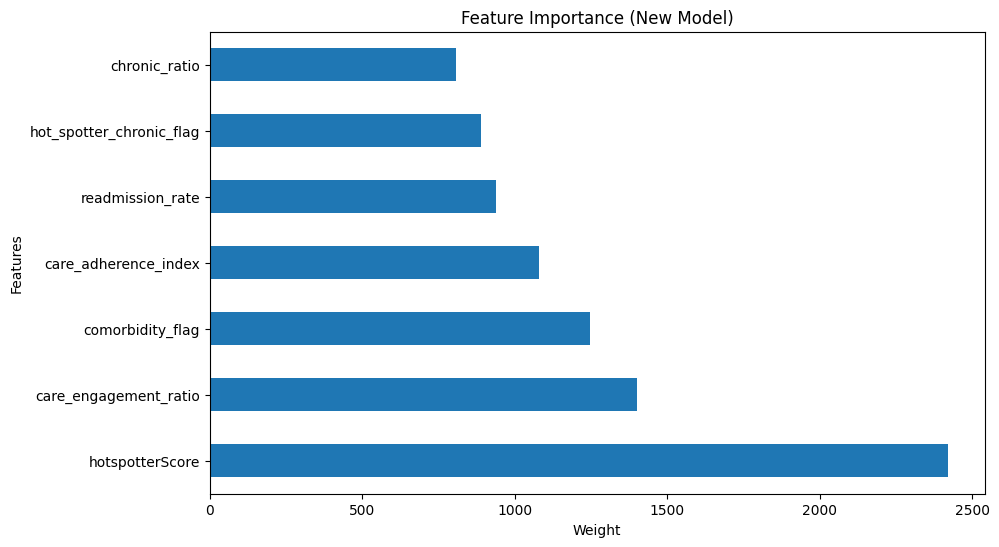

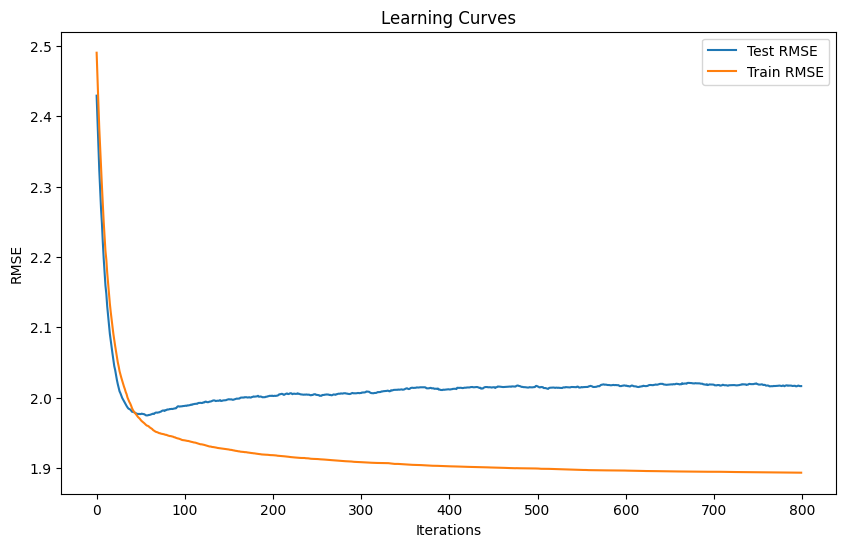

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

df_master = master_df.copy()


features_to_keep = [
    #'baseriskindex',
    'hotspotterScore',
    'readmission_rate',
    'hot_spotter_chronic_flag',
    'visit_acceleration_ratio',
    #'Followup_Compliance_Index',
    'care_adherence_index',
    'care_engagement_ratio',
    'chronic_ratio',
    'comorbidity_flag'
]

X = df_master[features_to_keep]
y = df_master['risk_score']

print(f"--- Re-training on {len(features_to_keep)} clean features ---")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eta': 0.05,
    'max_depth': 8,
    'min_child_weight': 5,
    'subsample': 0.85,
    'colsample_bytree': 0.8,
    'gamma': 1.0,
    'reg_alpha': 0.05,
    'reg_lambda': 3.0,
    'seed': 42,
    'nthread': -1,
    'tree_method': 'hist'
}

evals_result = {}
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=800,
    evals=[(dtest, 'eval'), (dtrain, 'train')],
    early_stopping_rounds=30,
    evals_result=evals_result,
    verbose_eval=False
)

# 4. EVALUATE
y_pred_test = xgb_model.predict(dtest)
new_r2_test = r2_score(y_test, y_pred_test)

y_pred_train = xgb_model.predict(dtrain)
new_r2_train = r2_score(y_train, y_pred_train)

print(f"--- Results with Clean Features & Regularization ---")
print(f"R-squared (on test set): {new_r2_test:.4f}")
print(f"R-squared (on train set): {new_r2_train:.4f}")
print(f"Best iteration: {xgb_model.best_iteration}")

# 5. PLOT FEATURE IMPORTANCE
feature_importances = xgb_model.get_score(importance_type='weight')
importance_series = pd.Series(feature_importances).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importance_series.head(10).plot(kind='barh')
plt.title('Feature Importance (New Model)')
plt.xlabel('Weight')
plt.ylabel('Features')
plt.show()

# 6. PLOT LEARNING CURVES
test_rmse = evals_result['eval']['rmse']
train_rmse = evals_result['train']['rmse']
plt.figure(figsize=(10, 6))
plt.plot(test_rmse, label='Test RMSE')
plt.plot(train_rmse, label='Train RMSE')
plt.title('Learning Curves')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

df_visit_test = pd.read_csv('/content/test/visit.csv')
df_care_test = pd.read_csv('/content/test/care.csv')
df_patient_test = pd.read_csv('/content/test/patient.csv')
df_diagnosis_test = pd.read_csv('/content/test/diagnosis.csv')
# df_risk_test = pd.read_csv('/content/test/risk.csv') # Removed as risk.csv is not in the test data

In [ ]:
print(df_visit_test.info())
print(df_visit_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   visit_id        1515 non-null   int64  
 1   visit_type      1515 non-null   object 
 2   patient_id      1515 non-null   int64  
 3   visit_start_dt  1515 non-null   object 
 4   visit_end_dt    1515 non-null   object 
 5   follow_up_dt    1515 non-null   object 
 6   prmry_proc_nm   0 non-null      float64
 7   prncpl_diag_nm  1515 non-null   object 
 8   readmsn_ind     1515 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 106.7+ KB
None
visit_id             0
visit_type           0
patient_id           0
visit_start_dt       0
visit_end_dt         0
follow_up_dt         0
prmry_proc_nm     1515
prncpl_diag_nm       0
readmsn_ind          0
dtype: int64


In [ ]:
print(df_visit_test['readmsn_ind'].unique())

# Correct the replacement and conversion
df_visit_test['readmsn_ind'] = df_visit_test['readmsn_ind'].replace('t', 1).replace('f', 0).replace('f ',0).astype(int)

print("\nUnique values in 'readmsn_ind' after replacement and conversion:")
print(df_visit_test['readmsn_ind'].unique())

['f' 't']

Unique values in 'readmsn_ind' after replacement and conversion:
[0 1]


/tmp/ipython-input-856457113.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_visit_test['readmsn_ind'] = df_visit_test['readmsn_ind'].replace('t', 1).replace('f', 0).replace('f ',0).astype(int)


In [ ]:
import numpy as np
placeholder_date = '8888-12-31'

df_visit_test['follow_up_dt_cleaned'] = df_visit_test['follow_up_dt'].replace(placeholder_date, np.nan)

df_visit_test['follow_up_dt_cleaned'] = pd.to_datetime(df_visit_test['follow_up_dt_cleaned'], errors='coerce')


df_visit_test['has_follow_up'] = (~df_visit_test['follow_up_dt_cleaned'].isnull()).astype(int)


print(df_visit_test[['visit_id', 'follow_up_dt', 'has_follow_up']].head())

   visit_id follow_up_dt  has_follow_up
0      7703   8888-12-31              0
1      7704   8888-12-31              0
2      7714   8888-12-31              0
3      7726   8888-12-31              0
4      7733   8888-12-31              0


In [ ]:
# Convert visit_start_dt and visit_end_dt to datetime
df_visit_test['visit_start_dt'] = pd.to_datetime(df_visit_test['visit_start_dt'], errors='coerce')
df_visit_test['visit_end_dt'] = pd.to_datetime(df_visit_test['visit_end_dt'], errors='coerce')

# Drop unnecessary columns
df_visit_test = df_visit_test.drop(columns=['follow_up_dt', 'follow_up_dt_cleaned'])

# Display the updated DataFrame info and head to verify
print("--- df_visit after converting dates and dropping columns ---")
print(df_visit_test.info())
display(df_visit_test.head())

--- df_visit after converting dates and dropping columns ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   visit_id        1515 non-null   int64         
 1   visit_type      1515 non-null   object        
 2   patient_id      1515 non-null   int64         
 3   visit_start_dt  1515 non-null   datetime64[ns]
 4   visit_end_dt    1515 non-null   datetime64[ns]
 5   prmry_proc_nm   0 non-null      float64       
 6   prncpl_diag_nm  1515 non-null   object        
 7   readmsn_ind     1515 non-null   int64         
 8   has_follow_up   1515 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(2)
memory usage: 106.7+ KB
None


,visit_id,visit_type,patient_id,visit_start_dt,visit_end_dt,prmry_proc_nm,prncpl_diag_nm,readmsn_ind,has_follow_up
0,7703,ER,95,2024-07-23,2024-07-23,NaN,"Strain of muscle, fascia and tendon of abdomen...",0,0
1,7704,URGENT CARE,95,2024-08-29,2024-08-29,NaN,Acute cough,0,0
2,7714,ER,168,2024-01-22,2024-01-22,NaN,"Foreign body of alimentary tract, part unspeci...",0,0
3,7726,URGENT CARE,309,2024-01-14,2024-01-14,NaN,"Acute pharyngitis, unspecified",0,0
4,7733,INPATIENT,333,2024-07-09,2024-07-11,NaN,"Major depressive disorder, recurrent severe wi...",0,0


In [ ]:
print(df_care_test.info())
print(df_care_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   care_id          107 non-null    int64  
 1   patient_id       107 non-null    int64  
 2   msrmnt_type      107 non-null    object 
 3   msrmnt_sub_type  107 non-null    object 
 4   msrmnt_value     107 non-null    float64
 5   last_care_dt     100 non-null    object 
 6   next_care_dt     35 non-null     object 
 7   care_gap_ind     107 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.8+ KB
None
care_id             0
patient_id          0
msrmnt_type         0
msrmnt_sub_type     0
msrmnt_value        0
last_care_dt        7
next_care_dt       72
care_gap_ind        0
dtype: int64


In [ ]:
print(df_care_test['care_gap_ind'].unique())

# Correct the replacement and conversion
df_care_test['care_gap_ind'] = df_care_test['care_gap_ind'].replace('t', 1).replace('f', 0).astype(int)

print("\nUnique values in 'care_gap_ind' after replacement and conversion:")
print(df_care_test['care_gap_ind'].unique())

['t']

Unique values in 'care_gap_ind' after replacement and conversion:
[1]


/tmp/ipython-input-2162300738.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_care_test['care_gap_ind'] = df_care_test['care_gap_ind'].replace('t', 1).replace('f', 0).astype(int)


In [ ]:
df_care_test['last_care_dt'] = pd.to_datetime(df_care_test['last_care_dt'], errors='coerce')
df_care_test['next_care_dt'] = pd.to_datetime(df_care_test['next_care_dt'], errors='coerce')

    # 3. Engineer 'days_since_last_care' feature
    #    This will be NaN where 'last_care_dt' was missing
df_care_test['days_since_last_care'] = (pd.to_datetime('today') - df_care_test['last_care_dt']).dt.days
df_care_test['days_since_last_care'] = df_care_test['days_since_last_care'].fillna(-1)

    # 4. Engineer 'has_scheduled_care' binary feature
df_care_test['has_scheduled_care'] = (~df_care_test['next_care_dt'].isnull()).astype(int)

In [ ]:
display(df_care_test.head())
print(df_care_test.info())
print(df_care_test.isnull().sum())

,care_id,patient_id,msrmnt_type,msrmnt_sub_type,msrmnt_value,last_care_dt,next_care_dt,care_gap_ind,days_since_last_care,has_scheduled_care
0,476,385,SCREENING,BREAST CANCER,0.0,2025-01-17,2027-01-17,1,289.0,1
1,478,804,SCREENING,COLORECTAL CANCER,0.0,2023-07-10,NaT,1,846.0,0
2,479,1200,SCREENING,COLORECTAL CANCER,0.0,2024-07-12,NaT,1,478.0,0
3,480,1300,SCREENING,COLORECTAL CANCER,0.0,2016-07-28,NaT,1,3384.0,0
4,497,3892,SCREENING,COLORECTAL CANCER,0.0,2021-09-27,NaT,1,1497.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   care_id               107 non-null    int64         
 1   patient_id            107 non-null    int64         
 2   msrmnt_type           107 non-null    object        
 3   msrmnt_sub_type       107 non-null    object        
 4   msrmnt_value          107 non-null    float64       
 5   last_care_dt          100 non-null    datetime64[ns]
 6   next_care_dt          35 non-null     datetime64[ns]
 7   care_gap_ind          107 non-null    int64         
 8   days_since_last_care  107 non-null    float64       
 9   has_scheduled_care    107 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(2)
memory usage: 8.5+ KB
None
care_id                  0
patient_id               0
msrmnt_type              0
msrmnt_sub_type          0
msrmn

In [ ]:
print(df_patient_test.info())
print(df_patient_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   patient_id                    2001 non-null   int64 
 1   age                           2001 non-null   int64 
 2   hot_spotter_identified_at     2001 non-null   object
 3   hot_spotter_readmission_flag  2001 non-null   object
 4   hot_spotter_chronic_flag      2001 non-null   object
dtypes: int64(2), object(3)
memory usage: 78.3+ KB
None
patient_id                      0
age                             0
hot_spotter_identified_at       0
hot_spotter_readmission_flag    0
hot_spotter_chronic_flag        0
dtype: int64


In [ ]:
import numpy as np
placeholder_date = '0001-01-01'

# 1. Replace the placeholder with a true null value (NaN)
df_patient_test['hot_spotter_dt_cleaned'] = df_patient_test['hot_spotter_identified_at'].replace(placeholder_date, np.nan)

# 2. Convert the cleaned column to a proper datetime
df_patient_test['hot_spotter_dt_cleaned'] = pd.to_datetime(df_patient_test['hot_spotter_dt_cleaned'], errors='coerce')

# 3. Engineer the 'is_hot_spotter' binary feature
df_patient_test['is_hot_spotter'] = (~df_patient_test['hot_spotter_dt_cleaned'].isnull()).astype(int)

# 4. Engineer the 'days_since_hotspotter' feature
df_patient_test['days_since_hotspotter'] = (pd.to_datetime('today') - df_patient_test['hot_spotter_dt_cleaned']).dt.days
df_patient_test['days_since_hotspotter'] = df_patient_test['days_since_hotspotter'].fillna(-1)

# See the results
print(df_patient_test[['patient_id', 'hot_spotter_identified_at', 'is_hot_spotter', 'days_since_hotspotter']].head())

   patient_id hot_spotter_identified_at  is_hot_spotter  days_since_hotspotter
0         276                0001-01-01               0                   -1.0
1         309                0001-01-01               0                   -1.0
2         327                0001-01-01               0                   -1.0
3         333                0001-01-01               0                   -1.0
4         344                0001-01-01               0                   -1.0


In [ ]:
print(df_patient_test['hot_spotter_readmission_flag'].unique())

# Correct the replacement and conversion
df_patient_test['hot_spotter_readmission_flag'] = df_patient_test['hot_spotter_readmission_flag'].replace('t', 1).replace('f', 0).astype(int)
df_patient_test['hot_spotter_readmission_flag'] = df_patient_test['hot_spotter_readmission_flag'].replace({'t': 1, 'f': 0, 'KANPUR': 0}).astype(int)
print("\nUnique values in 'hot_spotter_readmission_flag' after replacement and conversion:")
print(df_patient_test['hot_spotter_readmission_flag'].unique())

['f' 't']

Unique values in 'hot_spotter_readmission_flag' after replacement and conversion:
[0 1]


/tmp/ipython-input-851486491.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_patient_test['hot_spotter_readmission_flag'] = df_patient_test['hot_spotter_readmission_flag'].replace('t', 1).replace('f', 0).astype(int)


In [ ]:
print(df_patient_test['hot_spotter_chronic_flag'].unique())

# Correct the replacement and conversion
df_patient_test['hot_spotter_chronic_flag'] = df_patient_test['hot_spotter_chronic_flag'].replace('t', 1).replace('f', 0).astype(int)

print("\nUnique values in 'hot_spotter_chronic_flag' after replacement and conversion:")
print(df_patient_test['hot_spotter_chronic_flag'].unique())

['f' 't']

Unique values in 'hot_spotter_chronic_flag' after replacement and conversion:
[0 1]


/tmp/ipython-input-3922876327.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_patient_test['hot_spotter_chronic_flag'] = df_patient_test['hot_spotter_chronic_flag'].replace('t', 1).replace('f', 0).astype(int)


In [ ]:
df_patient_test = df_patient_test.drop(columns=['hot_spotter_identified_at', 'hot_spotter_dt_cleaned'])

# Display the updated DataFrame info and head to verify
print("--- df_patient after dropping date columns ---")
print(df_patient_test.info())
display(df_patient_test.head())

--- df_patient after dropping date columns ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    2001 non-null   int64  
 1   age                           2001 non-null   int64  
 2   hot_spotter_readmission_flag  2001 non-null   int64  
 3   hot_spotter_chronic_flag      2001 non-null   int64  
 4   is_hot_spotter                2001 non-null   int64  
 5   days_since_hotspotter         2001 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 93.9 KB
None


,patient_id,age,hot_spotter_readmission_flag,hot_spotter_chronic_flag,is_hot_spotter,days_since_hotspotter
0,276,18,0,0,0,-1.0
1,309,19,0,0,0,-1.0
2,327,28,0,0,0,-1.0
3,333,23,0,0,0,-1.0
4,344,54,0,0,0,-1.0


In [ ]:
print(df_diagnosis_test.info())
print(df_diagnosis_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   diagnosis_id           841 non-null    int64 
 1   patient_id             841 non-null    int64 
 2   condition_name         841 non-null    object
 3   condition_type         841 non-null    object
 4   condition_description  841 non-null    object
 5   is_chronic             841 non-null    object
dtypes: int64(2), object(4)
memory usage: 39.6+ KB
None
diagnosis_id             0
patient_id               0
condition_name           0
condition_type           0
condition_description    0
is_chronic               0
dtype: int64


In [ ]:
print("Unique values in 'is_chronic' before replacement:")
print(df_diagnosis_test['is_chronic'].unique())

# Re-run the replacement and conversion
df_diagnosis_test['is_chronic'] = df_diagnosis_test['is_chronic'].replace('t', 1).astype(int)

print("\nUnique values in 'is_chronic' after replacement and conversion:")
print(df_diagnosis_test['is_chronic'].unique())

Unique values in 'is_chronic' before replacement:
['t']

Unique values in 'is_chronic' after replacement and conversion:
[1]


/tmp/ipython-input-2393028942.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_diagnosis_test['is_chronic'] = df_diagnosis_test['is_chronic'].replace('t', 1).astype(int)


In [ ]:
display(df_diagnosis_test.head())
print(df_diagnosis_test.info())
print(df_diagnosis_test.isnull().sum())

,diagnosis_id,patient_id,condition_name,condition_type,condition_description,is_chronic
0,3242,5129,HYPERTENSION,CHRONIC,Hypertension past medical history,1
1,3246,79347,HYPERTENSION,CHRONIC,Hypertension past medical history,1
2,3247,57960,HYPERTENSION,CHRONIC,Hypertension past medical history,1
3,3248,31024,DIABETES,CHRONIC,Diabetes mellitus past medical history,1
4,3270,46292,HYPERTENSION,CHRONIC,Hypertension past medical history,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   diagnosis_id           841 non-null    int64 
 1   patient_id             841 non-null    int64 
 2   condition_name         841 non-null    object
 3   condition_type         841 non-null    object
 4   condition_description  841 non-null    object
 5   is_chronic             841 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 39.6+ KB
None
diagnosis_id             0
patient_id               0
condition_name           0
condition_type           0
condition_description    0
is_chronic               0
dtype: int64


In [ ]:
df_visit_test = df_visit_test.drop_duplicates(subset=['visit_id'])
df_care_test = df_care_test.drop_duplicates(subset=['care_id'])
df_diagnosis_test=df_diagnosis_test.drop_duplicates(subset=['diagnosis_id'])
df_patient_test=df_patient_test.drop_duplicates(subset=['patient_id'])
df_patient_test = df_patient_test.set_index('patient_id')

In [ ]:
df_diagnosis_test['condition_name'] = df_diagnosis_test['condition_name'].str.upper().str.strip()
df_diagnosis_test['patient_id'] = pd.to_numeric(df_diagnosis_test['patient_id'], errors='coerce')
df_diagnosis_test = df_diagnosis_test.dropna(subset=['patient_id'])
df_diagnosis_test['patient_id'] = df_diagnosis_test['patient_id'].astype(int)

In [ ]:
df_patient_test['agerisk']=df_patient_test['age']/100

In [ ]:
import numpy as np

# Replace -1 with NaN in 'days_since_hotspotter' for the calculation
df_patient_test['days_since_hotspotter_for_score'] = df_patient_test['days_since_hotspotter'].replace(-1, np.nan)

# Calculate HotspotterScore, handling NaN values
df_patient_test['hotspotterScore'] = np.exp(-df_patient_test['days_since_hotspotter_for_score'] / 365)

# Fill NaN values in HotspotterScore with 0
df_patient_test['hotspotterScore'] = df_patient_test['hotspotterScore'].fillna(0)

# Drop the temporary column
df_patient_test = df_patient_test.drop(columns=['days_since_hotspotter_for_score'])

display(df_patient_test.head())

,age,hot_spotter_readmission_flag,hot_spotter_chronic_flag,is_hot_spotter,days_since_hotspotter,agerisk,hotspotterScore
patient_id,,,,,,,
276,18,0,0,0,-1.0,0.18,0.0
309,19,0,0,0,-1.0,0.19,0.0
327,28,0,0,0,-1.0,0.28,0.0
333,23,0,0,0,-1.0,0.23,0.0
344,54,0,0,0,-1.0,0.54,0.0


In [ ]:
df_patient_test['baseriskindex'] = (
    0.3 * df_patient_test['agerisk'] +
    0.3 * df_patient_test['hot_spotter_chronic_flag'] +
    0.25 * df_patient_test['hot_spotter_readmission_flag'] +
    0.15 * df_patient_test['hotspotterScore']
)

display(df_patient_test.head())

,age,hot_spotter_readmission_flag,hot_spotter_chronic_flag,is_hot_spotter,days_since_hotspotter,agerisk,hotspotterScore,baseriskindex
patient_id,,,,,,,,
276,18,0,0,0,-1.0,0.18,0.0,0.054
309,19,0,0,0,-1.0,0.19,0.0,0.057
327,28,0,0,0,-1.0,0.28,0.0,0.084
333,23,0,0,0,-1.0,0.23,0.0,0.069
344,54,0,0,0,-1.0,0.54,0.0,0.162


In [ ]:
df_visit_test = df_visit_test.dropna(subset=['visit_start_dt', 'visit_end_dt'])
df_visit_test['visit_duration_days'] = (df_visit_test['visit_end_dt'] - df_visit_test['visit_start_dt']).dt.days
df_visit_test['visit_duration_days'] = df_visit_test['visit_duration_days'].apply(lambda x: max(0, x) if pd.notnull(x) else 0)

In [ ]:
start_30_days = pd.to_datetime('today') - pd.Timedelta(days=30)
start_365_days = pd.to_datetime('today') - pd.Timedelta(days=365)

df_visit_test['is_in_last_30_days'] = (
        (df_visit_test['visit_start_dt'] > start_30_days) &
        (df_visit_test['visit_start_dt'] <= pd.to_datetime('today'))
).astype(int)

    # 5. Create a flag for visits in the last 365 days (for the denominator)
df_visit_test['is_in_last_365_days'] = (
        (df_visit_test['visit_start_dt'] > start_365_days) &
        (df_visit_test['visit_start_dt'] <= pd.to_datetime('today'))
).astype(int)

In [ ]:
visit_agg_test = df_visit_test.groupby('patient_id').agg(
        total_visits=('visit_id', 'count'),
        total_readmissions=('readmsn_ind', 'sum'),
        total_follow_ups=('has_follow_up', 'sum'),
        visits_last_30_days=('is_in_last_30_days', 'sum'),
        visits_last_365_days=('is_in_last_365_days', 'sum')
    )

visit_agg_test['readmission_rate'] = visit_agg_test['total_readmissions'] / visit_agg_test['total_visits']

visit_agg_test['visit_acceleration_ratio'] = (
        visit_agg_test['visits_last_30_days'] /
        (visit_agg_test['visits_last_365_days'] + 1)
    )
visit_agg_test['followup_rate']=visit_agg_test['total_follow_ups']/(visit_agg_test['total_visits']+1)

In [ ]:
df_visit_test['is_inpatient'] = (df_visit_test['visit_duration_days'] > 0).astype(int)
inpatient_visits_agg = df_visit_test.groupby('patient_id')['is_inpatient'].sum()
visit_agg_test['inpatient_to_total_visit_ratio'] = inpatient_visits_agg / visit_agg_test['total_visits']

visit_agg_test['inpatient_to_total_visit_ratio'] = visit_agg_test['inpatient_to_total_visit_ratio'].fillna(0)


df_visit_test['is_ed_visit'] = (df_visit_test['visit_type'] == 'ER').astype(int)
ed_visits_agg = df_visit_test.groupby('patient_id')['is_ed_visit'].sum()
visit_agg_test['ed_visit_ratio'] = ed_visits_agg / visit_agg_test['total_visits']

visit_agg_test['ed_visit_ratio'] = visit_agg_test['ed_visit_ratio'].fillna(0)

visit_agg_test = visit_agg_test.rename(columns={'followup_rate': 'Followup_Compliance_Index'})

visit_agg_test['utilizationindex'] = (
    0.2 * visit_agg_test['visit_acceleration_ratio'] +
    0.2 * visit_agg_test['ed_visit_ratio'] +
    0.15 * visit_agg_test['inpatient_to_total_visit_ratio'] +
    0.15 * (1 - visit_agg_test['Followup_Compliance_Index']) +
    0.3 * visit_agg_test['readmission_rate']
)


display(visit_agg_test.head())

,total_visits,total_readmissions,total_follow_ups,visits_last_30_days,visits_last_365_days,readmission_rate,visit_acceleration_ratio,Followup_Compliance_Index,inpatient_to_total_visit_ratio,ed_visit_ratio,utilizationindex
patient_id,,,,,,,,,,,
95,2,0,0,0,0,0.0,0.0,0.0,0.0,0.5,0.250
168,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.350
309,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.150
333,2,0,0,0,0,0.0,0.0,0.0,0.5,0.5,0.325
344,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.350


In [ ]:
import numpy as np

care_agg_test = df_care_test.groupby('patient_id').agg(
    total_care_events=('care_id', 'count'),
    total_care_gaps=('care_gap_ind', 'sum'),
    total_scheduled_care=('has_scheduled_care', 'sum'),
    avg_days_since_last_care=('days_since_last_care', lambda x: x[x != -1].mean()), # Calculate mean excluding -1
    avg_hba1c=('msrmnt_value', lambda x: x[df_care.loc[x.index, 'msrmnt_sub_type'] == 'HbA1c'].mean()) # Calculate mean HbA1c
).reset_index()

care_agg_test['care_adherence_index'] = care_agg_test['total_care_gaps'] / care_agg_test['total_care_events']

care_agg_test['care_adherence_index'] = care_agg_test['care_adherence_index'].fillna(0)


care_agg_test['care_engagement_ratio'] = care_agg_test['total_scheduled_care'] / care_agg_test['total_care_events']

care_agg_test['care_engagement_ratio'] = care_agg_test['care_engagement_ratio'].fillna(0)

care_agg_test['avg_days_since_last_care'] = care_agg_test['avg_days_since_last_care'].fillna(36500) # Assuming 100 years as a large gap
care_agg_test['care_recency_index'] = np.exp(-care_agg_test['avg_days_since_last_care'] / 365)


care_agg_test['avg_hba1c'] = care_agg_test['avg_hba1c'].fillna(10)
care_agg_test['hba1c_control_score'] = 1 - (care_agg_test['avg_hba1c'] - 5.5) / 5

care_agg_test['hba1c_control_index'] = care_agg_test['hba1c_control_score'].clip(0, 1)


care_agg_test['carebehaviorscore'] = (
    0.4 * (1 - care_agg_test['care_adherence_index']) +
    0.3 * care_agg_test['care_recency_index'] +
    0.3 * (1 - care_agg_test['care_engagement_ratio'])
)

care_agg_test = care_agg_test.drop(columns=['hba1c_control_score'])

display(care_agg_test.head())

,patient_id,total_care_events,total_care_gaps,total_scheduled_care,avg_days_since_last_care,avg_hba1c,care_adherence_index,care_engagement_ratio,care_recency_index,hba1c_control_index,carebehaviorscore
0,385,1,1,1,289.0,10.0,1.0,1.0,0.453037,0.1,0.135911
1,804,1,1,0,846.0,0.0,1.0,0.0,0.098489,1.0,0.329547
2,1200,1,1,0,478.0,10.0,1.0,0.0,0.269931,0.1,0.380979
3,1300,1,1,0,3384.0,10.0,1.0,0.0,0.000094,0.1,0.300028
4,3892,1,1,0,1497.0,10.0,1.0,0.0,0.016550,0.1,0.304965


In [ ]:
# Scale the carebehaviorscore to a 0-1 range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
care_agg_test['carebehaviorscore'] = scaler.fit_transform(care_agg_test[['carebehaviorscore']])

display(care_agg_test.head())

,patient_id,total_care_events,total_care_gaps,total_scheduled_care,avg_days_since_last_care,avg_hba1c,care_adherence_index,care_engagement_ratio,care_recency_index,hba1c_control_index,carebehaviorscore
0,385,1,1,1,289.0,10.0,1.0,1.0,0.453037,0.1,0.308031
1,804,1,1,0,846.0,0.0,1.0,0.0,0.098489,1.0,0.746890
2,1200,1,1,0,478.0,10.0,1.0,0.0,0.269931,0.1,0.863457
3,1300,1,1,0,3384.0,10.0,1.0,0.0,0.000094,0.1,0.679988
4,3892,1,1,0,1497.0,10.0,1.0,0.0,0.016550,0.1,0.691177


In [ ]:
import numpy as np

# Calculate intermediate features for diagnosis_agg
diagnosis_agg_test = df_diagnosis_test.groupby('patient_id').agg(
    total_diagnoses=('diagnosis_id', 'count'),
    total_chronic_diagnoses=('is_chronic', 'sum'),
    has_diabetes=('condition_name', lambda x: (x.str.contains('DIABETES', na=False)).any().astype(int)),
    has_cancer=('condition_name', lambda x: (x.str.contains('CANCER', na=False)).any().astype(int)),
    has_hypertension=('condition_name', lambda x: (x.str.contains('HYPERTENSION', na=False)).any().astype(int))
).reset_index()

# Feature 1: chronic_ratio
diagnosis_agg_test['chronic_ratio'] = diagnosis_agg_test['total_chronic_diagnoses'] / diagnosis_agg_test['total_diagnoses']
diagnosis_agg_test['chronic_ratio'] = diagnosis_agg_test['chronic_ratio'].fillna(0) # Handle cases with no diagnoses

# Feature 2: disease_burden_index (DBI)
diagnosis_agg_test['disease_burden_index (DBI)'] = (
    0.5 * diagnosis_agg_test['chronic_ratio'] +
    0.2 * diagnosis_agg_test['has_diabetes'] +
    0.3 * diagnosis_agg_test['has_cancer']
)

# Feature 3: comorbidity_flag
diagnosis_agg_test['comorbidity_flag'] = (
    (diagnosis_agg_test['has_diabetes'] + diagnosis_agg_test['has_cancer'] + diagnosis_agg_test['has_hypertension']) >= 2
).astype(int)

# Feature 4: chronicburdenindex
# Use log transformation for chronic_count_score
diagnosis_agg_test['chronic_count_score'] = np.log10(diagnosis_agg_test['total_chronic_diagnoses'] + 1)

diagnosis_agg_test['chronicburdenindex'] = (
    0.5 * diagnosis_agg_test['disease_burden_index (DBI)'] +
    0.3 * diagnosis_agg_test['chronic_count_score'] +
    0.2 * diagnosis_agg_test['comorbidity_flag']
)

display(diagnosis_agg_test.head())

,patient_id,total_diagnoses,total_chronic_diagnoses,has_diabetes,has_cancer,has_hypertension,chronic_ratio,disease_burden_index (DBI),comorbidity_flag,chronic_count_score,chronicburdenindex
0,249,1,1,0,0,1,1.0,0.5,0,0.30103,0.340309
1,253,1,1,0,0,1,1.0,0.5,0,0.30103,0.340309
2,344,1,1,0,0,1,1.0,0.5,0,0.30103,0.340309
3,358,1,1,0,0,1,1.0,0.5,0,0.30103,0.340309
4,380,1,1,0,0,1,1.0,0.5,0,0.30103,0.340309


In [ ]:
# Merge df_patient with visit_agg
master_df_test = df_patient_test.merge(visit_agg_test, on='patient_id', how='left')

# Merge the result with care_agg
master_df_test = master_df_test.merge(care_agg_test, on='patient_id', how='left')

# Merge the result with diagnosis_agg
master_df_test = master_df_test.merge(diagnosis_agg_test, on='patient_id', how='left')

# Fill any remaining NaN values with 0 (assuming missing values imply absence of that feature/event)
master_df_test = master_df_test.fillna(0)


display(master_df_test.head())
print(master_df_test.info())

,patient_id,age,hot_spotter_readmission_flag,hot_spotter_chronic_flag,is_hot_spotter,days_since_hotspotter,agerisk,hotspotterScore,baseriskindex,total_visits,...,total_diagnoses,total_chronic_diagnoses,has_diabetes,has_cancer,has_hypertension,chronic_ratio,disease_burden_index (DBI),comorbidity_flag,chronic_count_score,chronicburdenindex
0,276,18,0,0,0,-1.0,0.18,0.0,0.054,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
1,309,19,0,0,0,-1.0,0.19,0.0,0.057,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
2,327,28,0,0,0,-1.0,0.28,0.0,0.084,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
3,333,23,0,0,0,-1.0,0.23,0.0,0.069,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
4,344,54,0,0,0,-1.0,0.54,0.0,0.162,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.5,0.0,0.30103,0.340309


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      2001 non-null   int64  
 1   age                             2001 non-null   int64  
 2   hot_spotter_readmission_flag    2001 non-null   int64  
 3   hot_spotter_chronic_flag        2001 non-null   int64  
 4   is_hot_spotter                  2001 non-null   int64  
 5   days_since_hotspotter           2001 non-null   float64
 6   agerisk                         2001 non-null   float64
 7   hotspotterScore                 2001 non-null   float64
 8   baseriskindex                   2001 non-null   float64
 9   total_visits                    2001 non-null   float64
 10  total_readmissions              2001 non-null   float64
 11  total_follow_ups                2001 non-null   float64
 12  visits_last_30_days             20

In [ ]:
# Identify the features used for training from the X DataFrame
train_features = X.columns.tolist()

# Select the same features from the test master dataframe
# Ensure 'patient_id' is not included in features for prediction
features_for_prediction_names = [feature for feature in train_features if feature != 'patient_id']
X_test_prediction = master_df_test[features_for_prediction_names]

# Convert the test features to DMatrix format for prediction
dtest_prediction = xgb.DMatrix(X_test_prediction)

# Generate predictions using the trained XGBoost model
predicted_risk_score = xgb_model.predict(dtest_prediction)

# Create a DataFrame with patient_id and predicted_risk_score
predictions_df = pd.DataFrame({
    'patient_id': master_df_test['patient_id'],
    'predicted_risk_score': predicted_risk_score
})

# Save the predictions to a CSV file in the test folder
predictions_df.to_csv('/content/test/Prediction.csv', index=False)

print("Prediction file 'Prediction.csv' created successfully in the '/content/test/' folder.")
display(predictions_df.head())

Prediction file 'Prediction.csv' created successfully in the '/content/test/' folder.


,patient_id,predicted_risk_score
0,276,0.994953
1,309,0.994953
2,327,0.994953
3,333,0.994953
4,344,1.816442


In [2]:
print("hello")

hello
